In [1]:
from google.colab import drive
drive.mount('/content/mydrive')

Mounted at /content/mydrive


In [2]:
%cd '/content/mydrive/MyDrive/BUITEMS/DeepLearning/Datasets/Cat_Dog_data'
%ls

/content/mydrive/MyDrive/BUITEMS/DeepLearning/Datasets/Cat_Dog_data
test/  train/


In [3]:
# Imports

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os

from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

In [4]:
base_dir = %pwd
train_dir = os.path.join(base_dir, 'train')
train_dog_dir = os.path.join(train_dir,'dog')
train_cat_dir = os.path.join(train_dir,'cat')


validation_dir = os.path.join(base_dir, 'test')
val_dog_dir = os.path.join(validation_dir,'dog')
val_cat_dir = os.path.join(validation_dir,'cat')

In [5]:
train_dog_fnames = os.listdir(os.path.join(train_dir,'dog'))
train_cat_fnames = os.listdir(os.path.join(train_dir, 'cat'))

test_dog_fnames = os.listdir(os.path.join(validation_dir,'dog'))
test_cat_fnames = os.listdir(os.path.join(validation_dir,'cat'))


print('There are {} dog and {} cat pictures in the training dataset.'.
      format(len(train_dog_fnames),len(train_cat_fnames)))

print('There are {} dog and {} cat pictures in the test dataset'.
      format(len(test_dog_fnames), len(test_cat_fnames)))

There are 274 dog and 274 cat pictures in the training dataset.
There are 88 dog and 88 cat pictures in the test dataset


In [6]:

for i in range(0,16):
  img = img_to_array(load_img(os.path.join(train_dog_dir,train_dog_fnames[i])))
  print('The dimension of image {} is {}.'.
        format(i,img.shape))



The dimension of image 0 is (499, 327, 3).
The dimension of image 1 is (375, 499, 3).
The dimension of image 2 is (292, 269, 3).
The dimension of image 3 is (397, 500, 3).
The dimension of image 4 is (500, 440, 3).
The dimension of image 5 is (373, 499, 3).
The dimension of image 6 is (433, 499, 3).
The dimension of image 7 is (375, 499, 3).
The dimension of image 8 is (221, 170, 3).
The dimension of image 9 is (374, 500, 3).
The dimension of image 10 is (458, 499, 3).
The dimension of image 11 is (480, 259, 3).
The dimension of image 12 is (268, 439, 3).
The dimension of image 13 is (101, 135, 3).
The dimension of image 14 is (375, 499, 3).
The dimension of image 15 is (375, 499, 3).


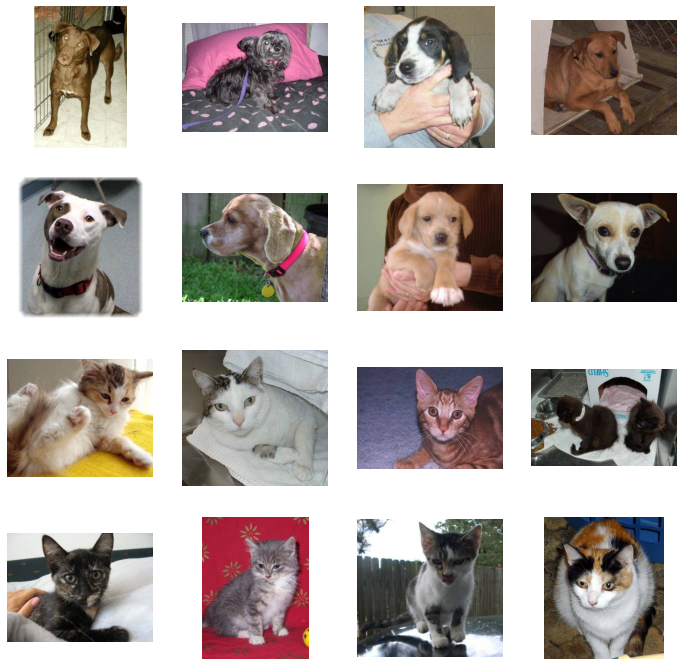

In [7]:
plt.figure(figsize=(12,12))
for i in range(0,16):
  if i<=7:
    img = load_img(os.path.join(train_dog_dir,train_dog_fnames[i]));
    plt.subplot(4,4,i+1)
    plt.imshow(img)
    plt.axis('off')
  else:
    img = load_img(os.path.join(train_cat_dir,train_cat_fnames[i]));
    plt.subplot(4,4,i+1)
    plt.imshow(img)
    plt.axis('off')


In [8]:
train_datagen = ImageDataGenerator(
    rescale=1./255
)

validation_datagen = ImageDataGenerator(
    rescale = 1./255
)

In [9]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150,150),
    batch_size= 32,
    class_mode = 'binary'
)

val_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size = (150,150),
    batch_size = 20,
    class_mode = 'binary'
)

Found 548 images belonging to 2 classes.
Found 176 images belonging to 2 classes.


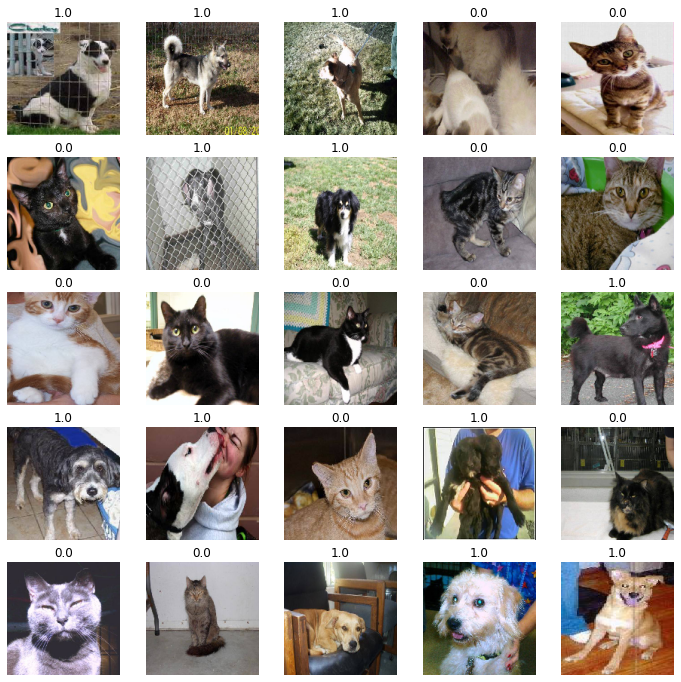

In [14]:

# img = train_generator.next()

# img1 = img[0]
# img2 = img[1]
# plt.imshow(img1[25,:,:,:])
# plt.title(img2[25])
# print(img1.shape)
# print(img2.shape)
plt.figure(figsize=(12,12))
for i in range(0,25):
  img = train_generator.next()


  plt.subplot(5,5,i+1)
  plt.imshow(img[0][0,:,:,:])
  plt.title(img[1][0].item())
  plt.axis('off')


In [15]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150,150,3)))
model.add(tf.keras.layers.MaxPooling2D((2,2)))

model.add(tf.keras.layers.Conv2D(32,(3,3),activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2,2)))

model.add(tf.keras.layers.Conv2D(64,(3,3),activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2,2)))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dense(1,activation='sigmoid'))

print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 18496)             0

In [16]:
model.compile(
    optimizer=tf.keras.optimizers.RMSprop(),
    loss = tf.keras.losses.binary_crossentropy,
    metrics = ['accuracy']
)

In [18]:
history = model.fit(
    train_generator,
    batch_size = 32,
    epochs = 10,
    validation_data = val_generator,
    validation_batch_size=20
)

Epoch 1/10
18/18 [==============================] - 47s 3s/step - loss: 0.8936 - accuracy: 0.5182 - val_loss: 0.6920 - val_accuracy: 0.5057
Epoch 2/10
18/18 [==============================] - 3s 156ms/step - loss: 0.6865 - accuracy: 0.5566 - val_loss: 0.7065 - val_accuracy: 0.4943
Epoch 3/10
18/18 [==============================] - 3s 150ms/step - loss: 0.6812 - accuracy: 0.5547 - val_loss: 0.6974 - val_accuracy: 0.5057
Epoch 4/10
18/18 [==============================] - 3s 150ms/step - loss: 0.6936 - accuracy: 0.6131 - val_loss: 0.6948 - val_accuracy: 0.5682
Epoch 5/10
18/18 [==============================] - 3s 151ms/step - loss: 0.6561 - accuracy: 0.7099 - val_loss: 0.7614 - val_accuracy: 0.4886
Epoch 6/10
18/18 [==============================] - 3s 150ms/step - loss: 0.5645 - accuracy: 0.7628 - val_loss: 0.7427 - val_accuracy: 0.6080
Epoch 7/10
18/18 [==============================] - 3s 146ms/step - loss: 0.5271 - accuracy: 0.7336 - val_loss: 0.9393 - val_accuracy: 0.5114
Epoch 8/

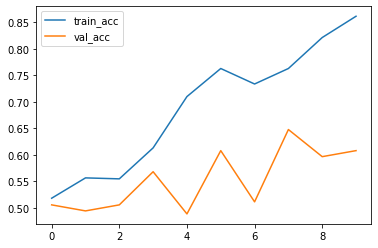

In [26]:
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']


plt.plot(train_acc);
plt.plot(val_acc);
plt.legend(['train_acc','val_acc']);